#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

In [2]:
%matplotlib inline

#### Initializing variables

In [12]:
# Geometry on X
Lx = 1
Nx = 50
dx = Lx/(Nx - 1)

# Geometry on Y
Ly = 1
Ny = 50
dy = Ly/(Ny - 1)

# Mesh
Xv = np.linspace(0, Lx, Nx)
Yv = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(Xv, Yv)

# Time
dt = 0.001
Nt = 10_000

# Material is Cordierite 
k = 2.5    #W/(m*K)
cv = 900   #J/(kg*C)
rho = 2300 #kg/m3

alpha = k/(rho*cv)

# Heat Source
Q = 0

# Boundary Conditions
T_left = 0
T_top = 30
T_right = 100
T_bottom = 50

coef = alpha*dt/(dx**2)

#### Setup and calculation

In [13]:
T = np.zeros((Nt, Ny, Nx))

In [14]:
# Initializing BCs
for i in range(Nt):
    for k in range(Ny):
        T[i, k, 0] = T_left
        T[i, k, -1] = T_right

    for j in range(Nx):
        T[i, 0, j] = T_bottom
        T[i, -1, j] = T_top

In [15]:
def second_deriv_x(T, i, j, k):
    return (T[i, j, k + 1] - 2*T[i, j, k] + T[i, j, k - 1])/dx**2

def second_deriv_y(T, i, j, k):
    return (T[i, j + 1, k] - 2*T[i, j, k] + T[i, j - 1, k])/dy**2

#### Explicit method

In [16]:
for i in range(1, Nt):
    for j in range(1, Nx - 1):
        for k in range(1, Ny - 1):
            T[i, j, k] = T[i - 1, j, k] + alpha*dt*(second_deriv_x(T, i -1 , j , k) + second_deriv_y(T, i -1 , j, k))

In [17]:
def pplot(N = 4, start = 0, step = 1):
    nlines = N//2
    fig, axs = plt.subplots(nlines, 2, figsize = (10, 4*nlines))
    fig.tight_layout(pad = 5)

    num_ticks = 11
    # number of points in x and y
    nx = len(Xv)
    ny = len(Yv)
    # the index of the position of yticks
    yticks = np.linspace(0, len(Yv) - 1, num_ticks, dtype=int)
    xticks = np.linspace(0, len(Xv) - 1, num_ticks, dtype=int)

    fmtx = lambda x, pos: '{:.2f}'.format(x*Lx/nx, pos)
    fmty = lambda y, pos: '{:.2f}'.format(y*Ly/ny, pos)

    for i in range(N):
        idxLine = i//2
        idxCol = i % 2

        sns.heatmap(
        T[start + step*i],
        ax = axs[idxLine, idxCol],
        cmap = "Spectral_r")

        axs[idxLine, idxCol].invert_yaxis()
        axs[idxLine, idxCol].set_xticks(xticks)
        axs[idxLine, idxCol].set_yticks(yticks)

        axs[idxLine, idxCol].set(xlabel = r'$x^*$', ylabel = r'$y^*$')
        axs[idxLine, idxCol].set_title('t = %.3e' % (i*dt))
        axs[idxLine, idxCol].xaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmtx))
        axs[idxLine, idxCol].yaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmty))
    
    plt.show()

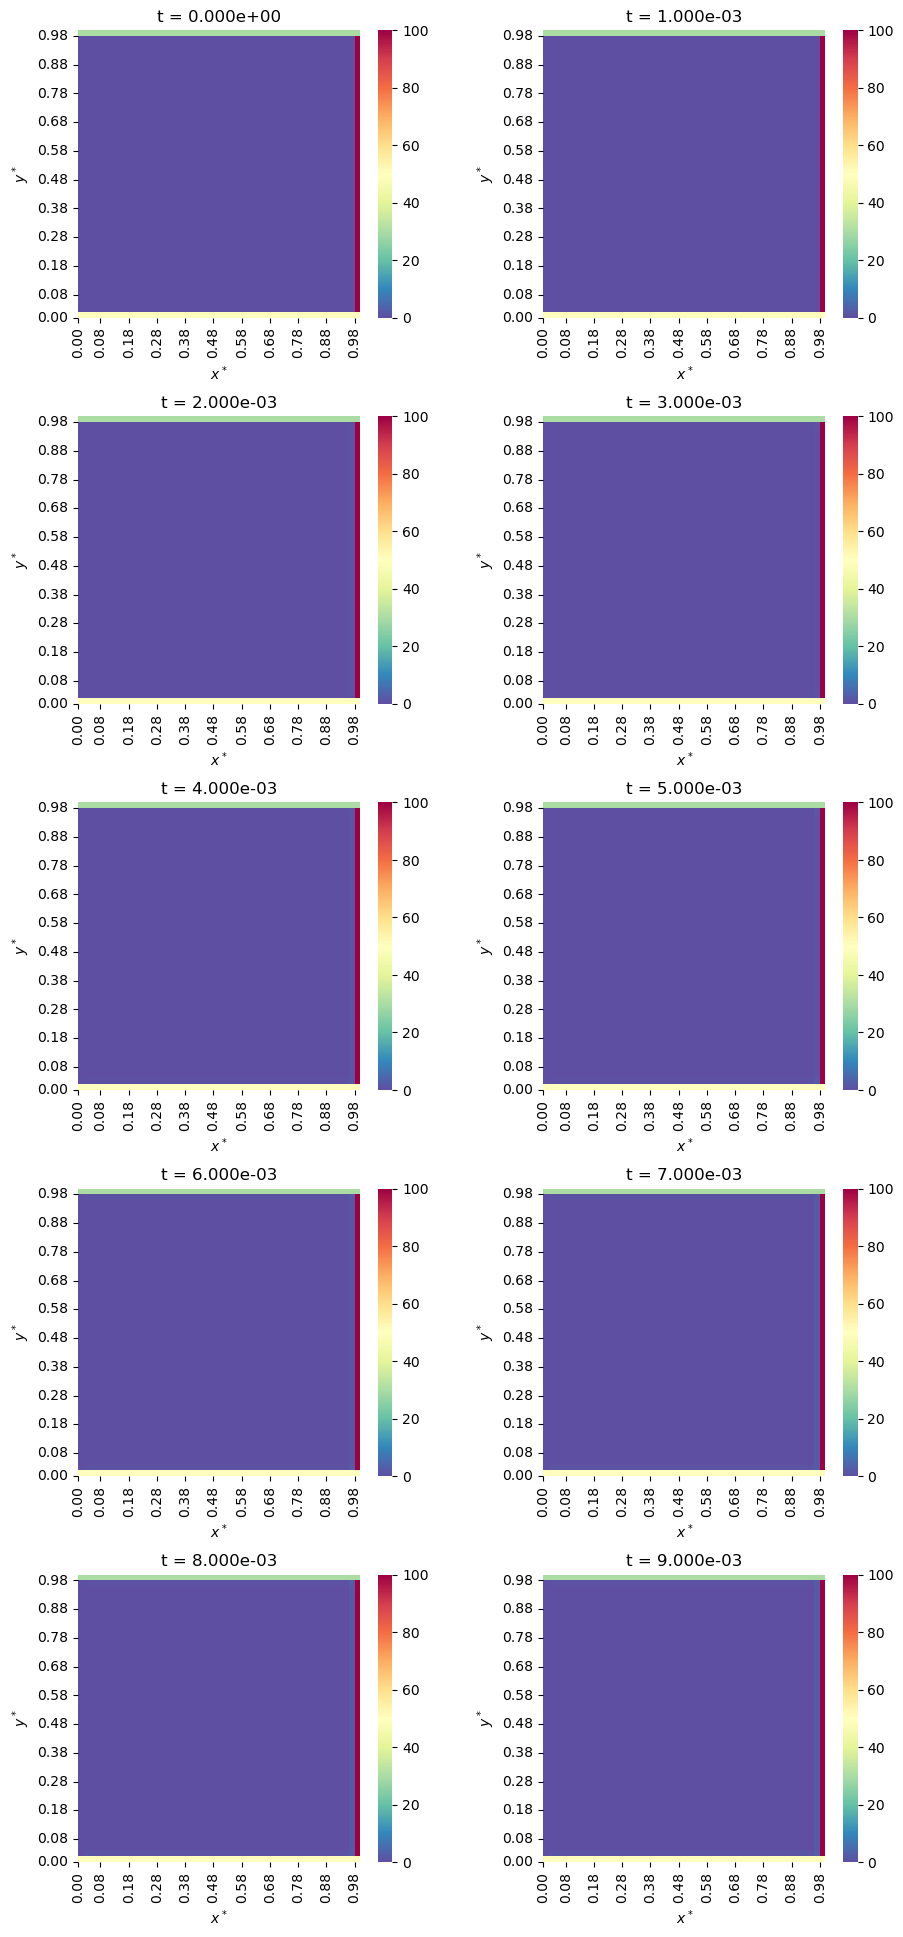

In [18]:
pplot(N = 10, step = 800)